### 군집(Clustering)

* 참고 : https://subinium.github.io/MLwithPython-3-1/

`군집 Clustering`은 데이터셋을 클러스터 Cluster라는 구룹으로 나누는 작업이다. 한 클러스터 안의 데이터포인트끼리 매우 비슷하고, 다른 데이터포인트와는 구분이 되도록 데이터를 나누는 것이 목표이다. 분류알고리즘과 비슷하게 군집알고리즘은 각 데이터 포인터가 어는 클러스터에 속하는 지 할당 또는 예측하는 것이다.

#### Clustering(군집합)

1. 분류의 2가지종류

 - Classification
 - Clustering

2. 군집분석의 원리

 - 거리가 가까운 (유사도가 높은) 객체들을 서로 묶어 하나의 그룹으로 정리
 - 거리(유사도)의 계산방법
   * 유클리드거리(Euclidean distance)가 주로 사용 : 피타고라스정리
   * 맨해턴거리(Mahhattan distance)
 - 군집화의 방법
   * 계층적군집화 방법 : Hierachical method
   * 비계층적 군집화 방법 : K-means clustering(가장 많이 사용)

#### K-means

`K-means, K-평균`군집은 가장 간단하고 널리 사용하는 군집알고리즘이다. 이 알고리즘은 데이터의 어떤 영역을 대표하는 `클러스터 중심 Cluster center`를 찾는다. 이 알고리즘은 두 단계를 반복하는데 먼저 데이터 포인트를 가장 가까운 클러스터 중심에 할당하고 그 다음 클러스터에 할당된 데이터 포인트의 평균으로 클러스터의 중심을 다시 지정한다. 클러스터에 할당되는 데이터포인트에 변화가 없을 때 알고리즘이 종료가 된다.

1. k-means 군집화의 실행단계

 - 나누고자 하는 클러스터의 갯수를 설정, 그 갯수만큼의 `임의의 초기점 생성`
 - initial point를 군집의 중심점으로 생각하고 군집구분을 실시
 - 군집별로 새로운 군집 중심점을 계산
 - 새로운 군집중심점을 기준으로 군집구분을 실시
 - 더이상 군집 구분의 변화가 없을 때까지 군집중심점을 반복 계산
 
2. k-means clustering의 장단점
 - 장점 : 적용이 쉽고 간단하다.
 - 단점 : 군집의 갯수 K값은 사전에 설정해야 한다.(예를 들어 붓꽃 3개인데 2개로 하면 왜곡)
          군집설정에 Outlier(이상치)의 영향이 크게 적용된다.

3. KNN알고리즘(K-means와 다른 알고리즘이므로 주의)
 - k-최근접이웃알고리즘(kNN, k-Nearest Neighbor) : 분류알고리즘 vs 군집알고리즘
 - 지도학습 vs 비지도학습
 - 분류방법 : 동일 값이라도 k의 갯수에 따라 분류결과가 달라진다.
   * k=1인 경우 : 새로운 값이 있을 때 제일 가까운 값으로 분류
   * k=3인 경우 : 새로운 값이 있을 때 다수에 가까운 값으로 분류
   * k값은 홀수로 정의하는 것이 일반적

1. K-means

In [28]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'D2Coding'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
import mglearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

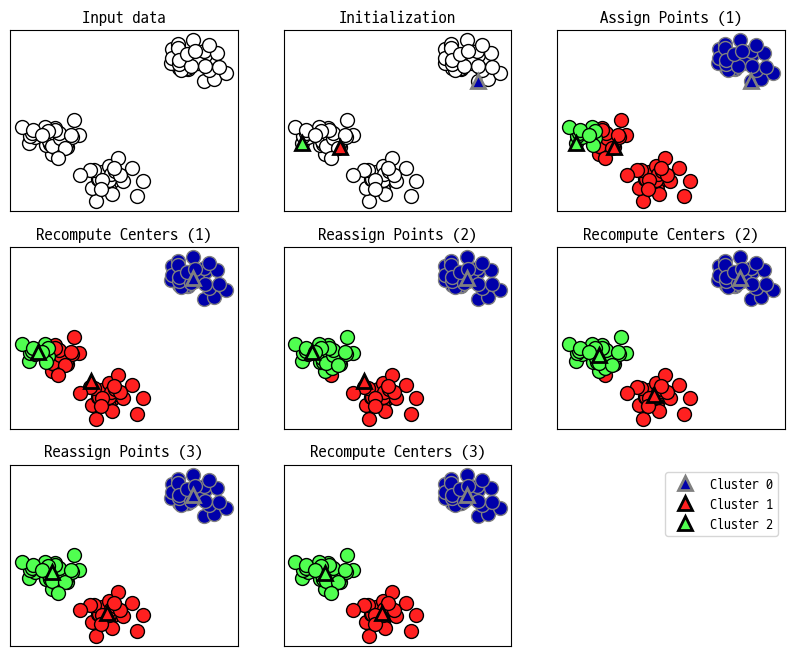

In [3]:
mglearn.plots.plot_kmeans_algorithm()

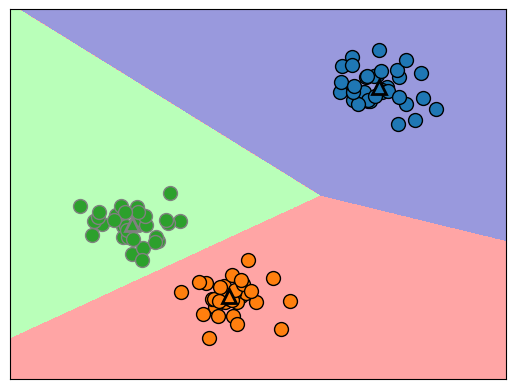

In [4]:
mglearn.plots.plot_kmeans_boundaries()

2. 인위적인 2차원 데이터 셋

In [10]:
X, y = datasets.make_blobs(random_state=42)
print(X.shape, y.shape)
print(f'임의의 데이터셋의 군집 = {np.unique(y)}')

(100, 2) (100,)
임의의 데이터셋의 군집 = [0 1 2]


In [12]:
# KMeans 군집화 모델 학습
# 클러스터의 갯수 : k = 3
# 비지도학습이기 때문에 X값만 전달(input)
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [13]:
print(dir(kmeans))

['__abstractmethods__', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_algorithm', '_check_feature_names', '_check_mkl_vcomp', '_check_n_features', '_check_params_vs_input', '_check_test_data', '_estimator_type', '_get_param_names', '_get_tags', '_init_centroids', '_more_tags', '_n_features_out', '_n_init', '_n_threads', '_parameter_constraints', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_sklearn_auto_wrap_output_keys', '_tol', '_transform', '_validate_center_shape', '_validate_data', '_validate_params', '_warn_mkl_vcomp', 'algorithm', 'cluster_centers_', 'copy_x', 'fit', 'fit_predict', 'fit_transform'

In [15]:
print(kmeans.labels_)
print(y)

[1 0 2 0 1 0 2 0 0 2 2 1 1 2 2 1 1 2 1 1 2 1 1 2 2 2 0 1 1 1 1 0 0 1 2 2 2
 2 0 0 1 2 0 2 2 0 1 1 1 0 0 0 2 1 1 1 2 2 0 2 1 0 1 0 1 1 0 1 0 0 0 1 1 2
 0 1 0 1 0 0 2 0 2 1 2 2 2 0 2 0 0 0 2 0 2 2 2 0 1 2]
[2 1 0 1 2 1 0 1 1 0 0 2 2 0 0 2 2 0 2 2 0 2 2 0 0 0 1 2 2 2 2 1 1 2 0 0 0
 0 1 1 2 0 1 0 0 1 2 2 2 1 1 1 0 2 2 2 0 0 1 0 2 1 2 1 2 2 1 2 1 1 1 2 2 0
 1 2 1 2 1 1 0 1 0 2 0 0 0 1 0 1 1 1 0 1 0 0 0 1 2 0]


In [19]:
print(kmeans.predict(X))
print(f'kmeans 학습모델의 예측율 = {np.mean(kmeans.labels_ == y)} %')

# 결과분석
# kmeans는 비지도학습이기 때문에 정답과 일치하는 결과를 내는 것이 아니라
# kmeans에서 분류한 군집을 무작위로 0,1..의 순번으로 군집을 나타낸다.

[1 0 2 0 1 0 2 0 0 2 2 1 1 2 2 1 1 2 1 1 2 1 1 2 2 2 0 1 1 1 1 0 0 1 2 2 2
 2 0 0 1 2 0 2 2 0 1 1 1 0 0 0 2 1 1 1 2 2 0 2 1 0 1 0 1 1 0 1 0 0 0 1 1 2
 0 1 0 1 0 0 2 0 2 1 2 2 2 0 2 0 0 0 2 0 2 2 2 0 1 2]
kmeans 학습모델의 예측율 = 0.0 %


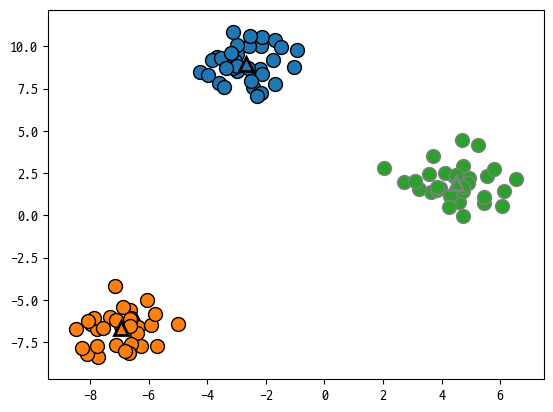

In [25]:
# 시각화
kmeans = KMeans(n_clusters=3).fit(X)
label3 = np.unique(kmeans.labels_)
# label3

mglearn.discrete_scatter(X[:,0], X[:,1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1]
                        , label3, markers='^', markeredgewidth=2) 
plt.show()

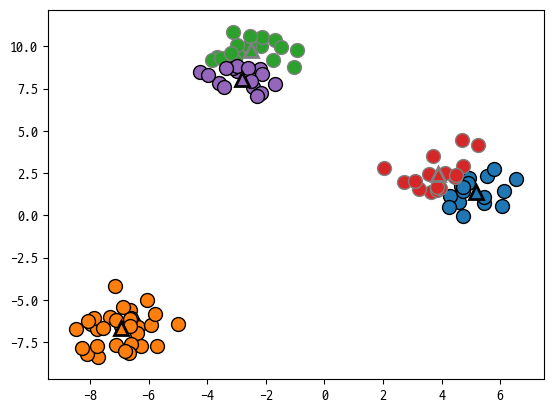

In [27]:
kmeans = KMeans(n_clusters=5).fit(X)
label3 = np.unique(kmeans.labels_)
# label3

mglearn.discrete_scatter(X[:,0], X[:,1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1]
                        , label3, markers='^', markeredgewidth=2) 
plt.show()

##### K-means 알고리즘이 실해하는 경우

* 데이터셋의 클러스터 갯수를 정확하게 알고 있더라도 K-means알고리즘이 항상 구분할 수 있는 것은 아니다.
* 각 클러스터를 정의하는 것이 중심 하나뿐이기 때문에 둥근형태로 나타낟다.
* 예를 들어 반월형태의 2개의 군집을 분류할 경우 K-means알고리즘의 예측율은 현저하게 떨어지게 된다.

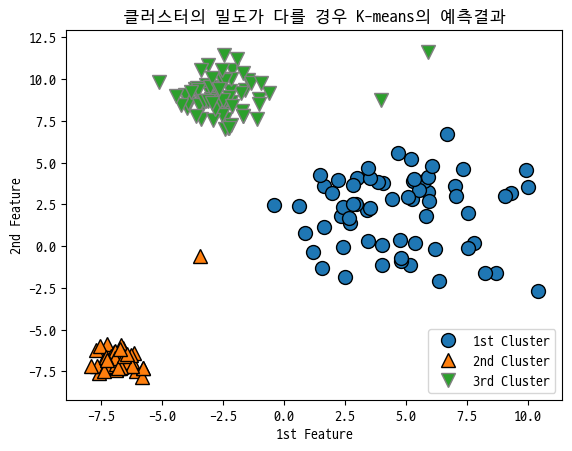

In [37]:
X, y = datasets.make_blobs(n_samples=200, cluster_std=[1.0, 2.5, 0.5], random_state=42)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X)
mglearn.discrete_scatter(X[:,0], X[:,1], y_pred)
plt.legend(['1st Cluster','2nd Cluster','3rd Cluster',])
plt.xlabel('1st Feature'); plt.ylabel('2nd Feature') 
plt.title('클러스터의 밀도가 다를 경우 K-means의 예측결과')
plt.show()

#### K-means알고리즘이 잘 분류하지 못하는 경우

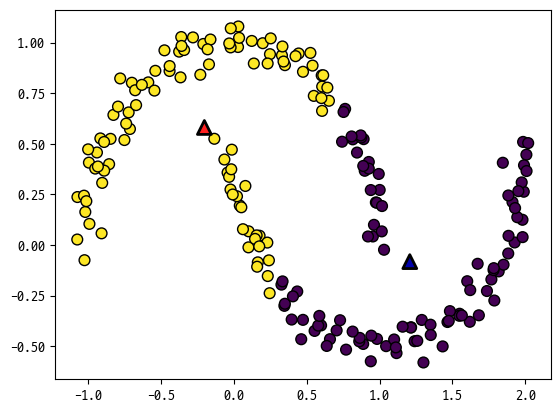

In [64]:
# 1. 데이터셋의 분포가 반월형태일 경우
# 1) 인위적으로 복잡한 군집을 가진 데이터 - make_moons()
X, y = datasets.make_moons(n_samples=200, noise=0.05, random_state=0)

kmeans  = KMeans(n_clusters=2).fit(X)
y_pred = kmeans.predict(X)
# print(y_pred)

# 2) 임의적인 원시데이터 샘플
plt.scatter(X[:,0], X[:,1], c=y_pred, s=60, edgecolors='k')

# 3) 기계학습의 군집결과(군집의 중심점)
plt.scatter(kmeans.cluster_centers_[:,0]
          , kmeans.cluster_centers_[:,1]
          , marker='^'
          , c=[mglearn.cm2(0), mglearn.cm2(1)]
          , s=100
          , linewidths=2
          , edgecolors='k') 
plt.show()

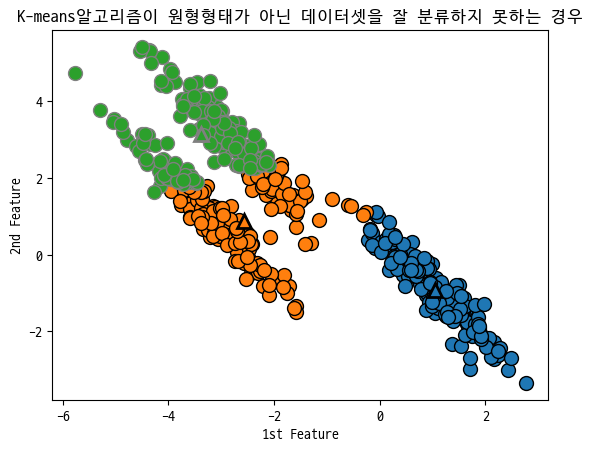

In [62]:
# 2. 데이터셋의 분포가 원형이 아닐 경우
# 1) 무작위로 임의의 데이터셋을 생성
X, y = datasets.make_blobs(n_samples=500, random_state=170)
rng = np.random.RandomState(74)

# 2) 임의의 데이터가 길게 늘어지도록 인위적으로 변경
# 임의의 데이터를 행렬연산 X * rng
tansformation = rng.normal(size=(2,2))
X = np.dot(X, tansformation)

# 3) K=3
kmeans = KMeans(n_clusters=3).fit(X)
y_pred = kmeans.predict(X)

# 4) 시각화
mglearn.discrete_scatter(X[:,0], X[:,1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:,0]
                        ,kmeans.cluster_centers_[:,1]
                        ,[0,1,2]
                        ,markers='^'
                        ,markeredgewidth=2)

plt.xlabel('1st Feature');plt.ylabel('2nd Feature')
plt.title('K-means알고리즘이 원형형태가 아닌 데이터셋을 잘 분류하지 못하는 경우')
plt.show()

In [63]:
# K-means알고리즘 적용하기
# 실습1. 유방암데이터셋
# 실습2. iris데이터셋